> ## 데이터 청년 캠퍼스 12주차 과제
> ### <b>노재혁</b>

### 1. 단순선형회귀 
#### RM변수와 LSTAT변수로 price를 예측하도록 각각 단순선형회귀분석 후 결과 분석

- Boston 주택 가격데이터 이용

In [1]:
# 라이브러리 호출

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error as mse
import random

In [2]:
# 보스턴 데이터프레임 생성 및 타겟 추출

boston = datasets.load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target

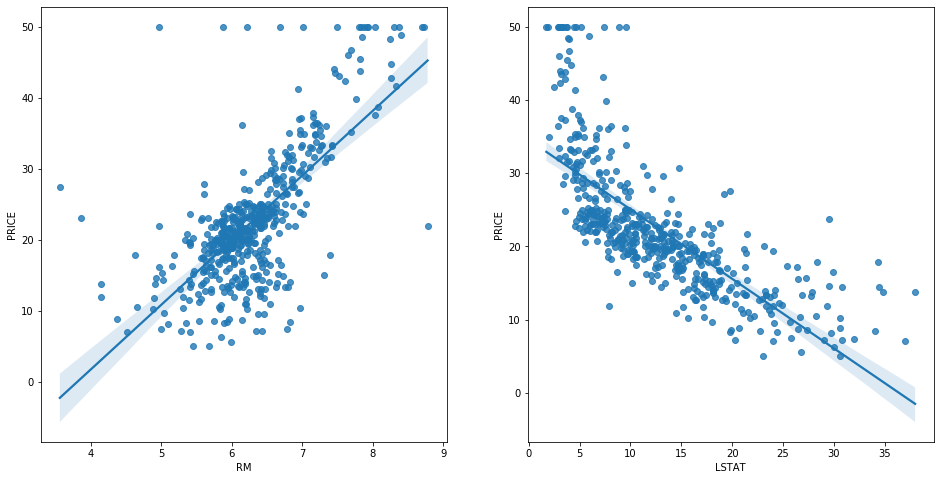

In [3]:
# RM, LSTAT 데이터와 타겟 변수간의 regplot

fig, axs = plt.subplots(figsize=(16, 8), ncols=2, nrows=1)
lm_features = ['RM', 'LSTAT']

for index, feature in enumerate(lm_features):
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[index])

In [4]:
# 단순선형회귀 함수정의

def simple_linear(lm_features):
    for f in lm_features:
        feature_price = boston_df[[f, 'PRICE']]
        price = boston_df[['PRICE']]
        feature = boston_df[[f]]
        feature1 = sm.add_constant(feature, has_constant='add')
        #print(feature1)
        reg = sm.OLS(price, feature1)
        fitted_model = reg.fit()
        pred = fitted_model.predict(feature1)
        
        print(f'\n{f}그래프의 결과그래프 및 잔차 그래프')
        linear_graph(feature, price, pred)
        resid_graph(fitted_model)

In [5]:
# 단순선형회귀 결과 그래프

def linear_graph(feature, price, pred):
    plt.scatter(feature, price, label='data')
    plt.plot(feature, pred, label='result')
    plt.legend()
    plt.show()

In [6]:
# 단순선형회귀 결과 잔차그래프

def resid_graph(fitted_model):
    fitted_model.resid.plot()
    plt.xlabel('residual_number')
    plt.show()


RM그래프의 결과그래프 및 잔차 그래프


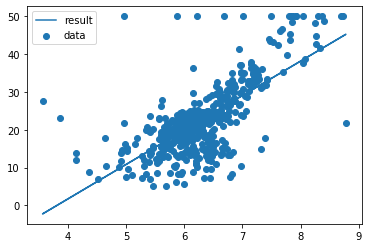

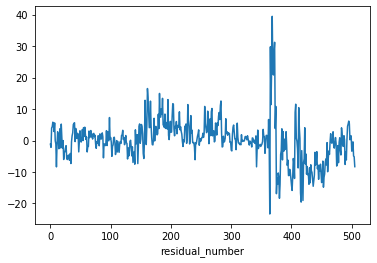


LSTAT그래프의 결과그래프 및 잔차 그래프


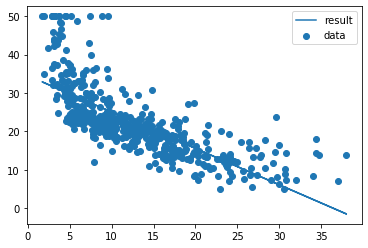

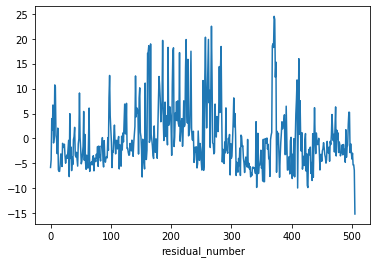

In [7]:
# 단순선형회귀 결과

simple_linear(lm_features)

-------

###  2. 다중선형회귀와 단순선형회귀계수 비교
#### CRIM, RM, LSTAT 세개 변수로 다중선형회귀 적합한 결과와  각각의 변수를 단순선형회귀 적합한 모델의 회귀계수를 비교 

- Boston 주택 가격데이터 이용

In [8]:
# 다중선형회귀 

feature_list = ['CRIM', 'RM', 'LSTAT']

In [9]:
def multi_linear(feature_list):
    multi_data = boston_df[feature_list]
    price = boston_df['PRICE']
    multi_data1 = sm.add_constant(multi_data, has_constant='add')
    multi_model = sm.OLS(price, multi_data1)
    fitted_multi_model = multi_model.fit()
    print(f'{feature_list}의 다중모델 회귀계수\n {fitted_multi_model.params}\n')

In [10]:
def simple_linear_in_multi(feature_list):
    for f in feature_list:
        simple_data = boston_df[f]
        price = boston_df['PRICE']
        simple_data1 = sm.add_constant(simple_data, has_constant='add')
        simple_model = sm.OLS(price, simple_data1)
        fitted_multi_model = simple_model.fit()
        print(f'\n{f}변수 모델 회귀계수\n {fitted_multi_model.params}')

In [11]:
def multi_simple_comparison(feature_list):
    multi_linear(feature_list)
    simple_linear_in_multi(feature_list)

In [12]:
multi_simple_comparison(feature_list)

['CRIM', 'RM', 'LSTAT']의 다중모델 회귀계수
 const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64


CRIM변수 모델 회귀계수
 const    24.033106
CRIM     -0.415190
dtype: float64

RM변수 모델 회귀계수
 const   -34.670621
RM        9.102109
dtype: float64

LSTAT변수 모델 회귀계수
 const    34.553841
LSTAT    -0.950049
dtype: float64


---------

### 3. 다중공선성과 회귀모델 성능 확인
####  (1) CRIM, RM, LSTAT, B, TAX, AGE, ZN, NOX, INDUS 변수로 데이터를 분할 하여 회귀 모형 생성 후 성능확인



In [13]:
x_data = boston_df[['CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS']]
price = boston_df[['PRICE']]

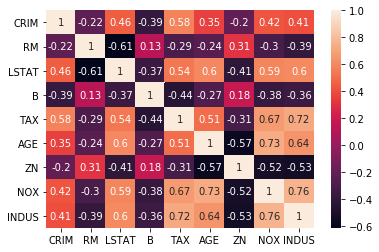

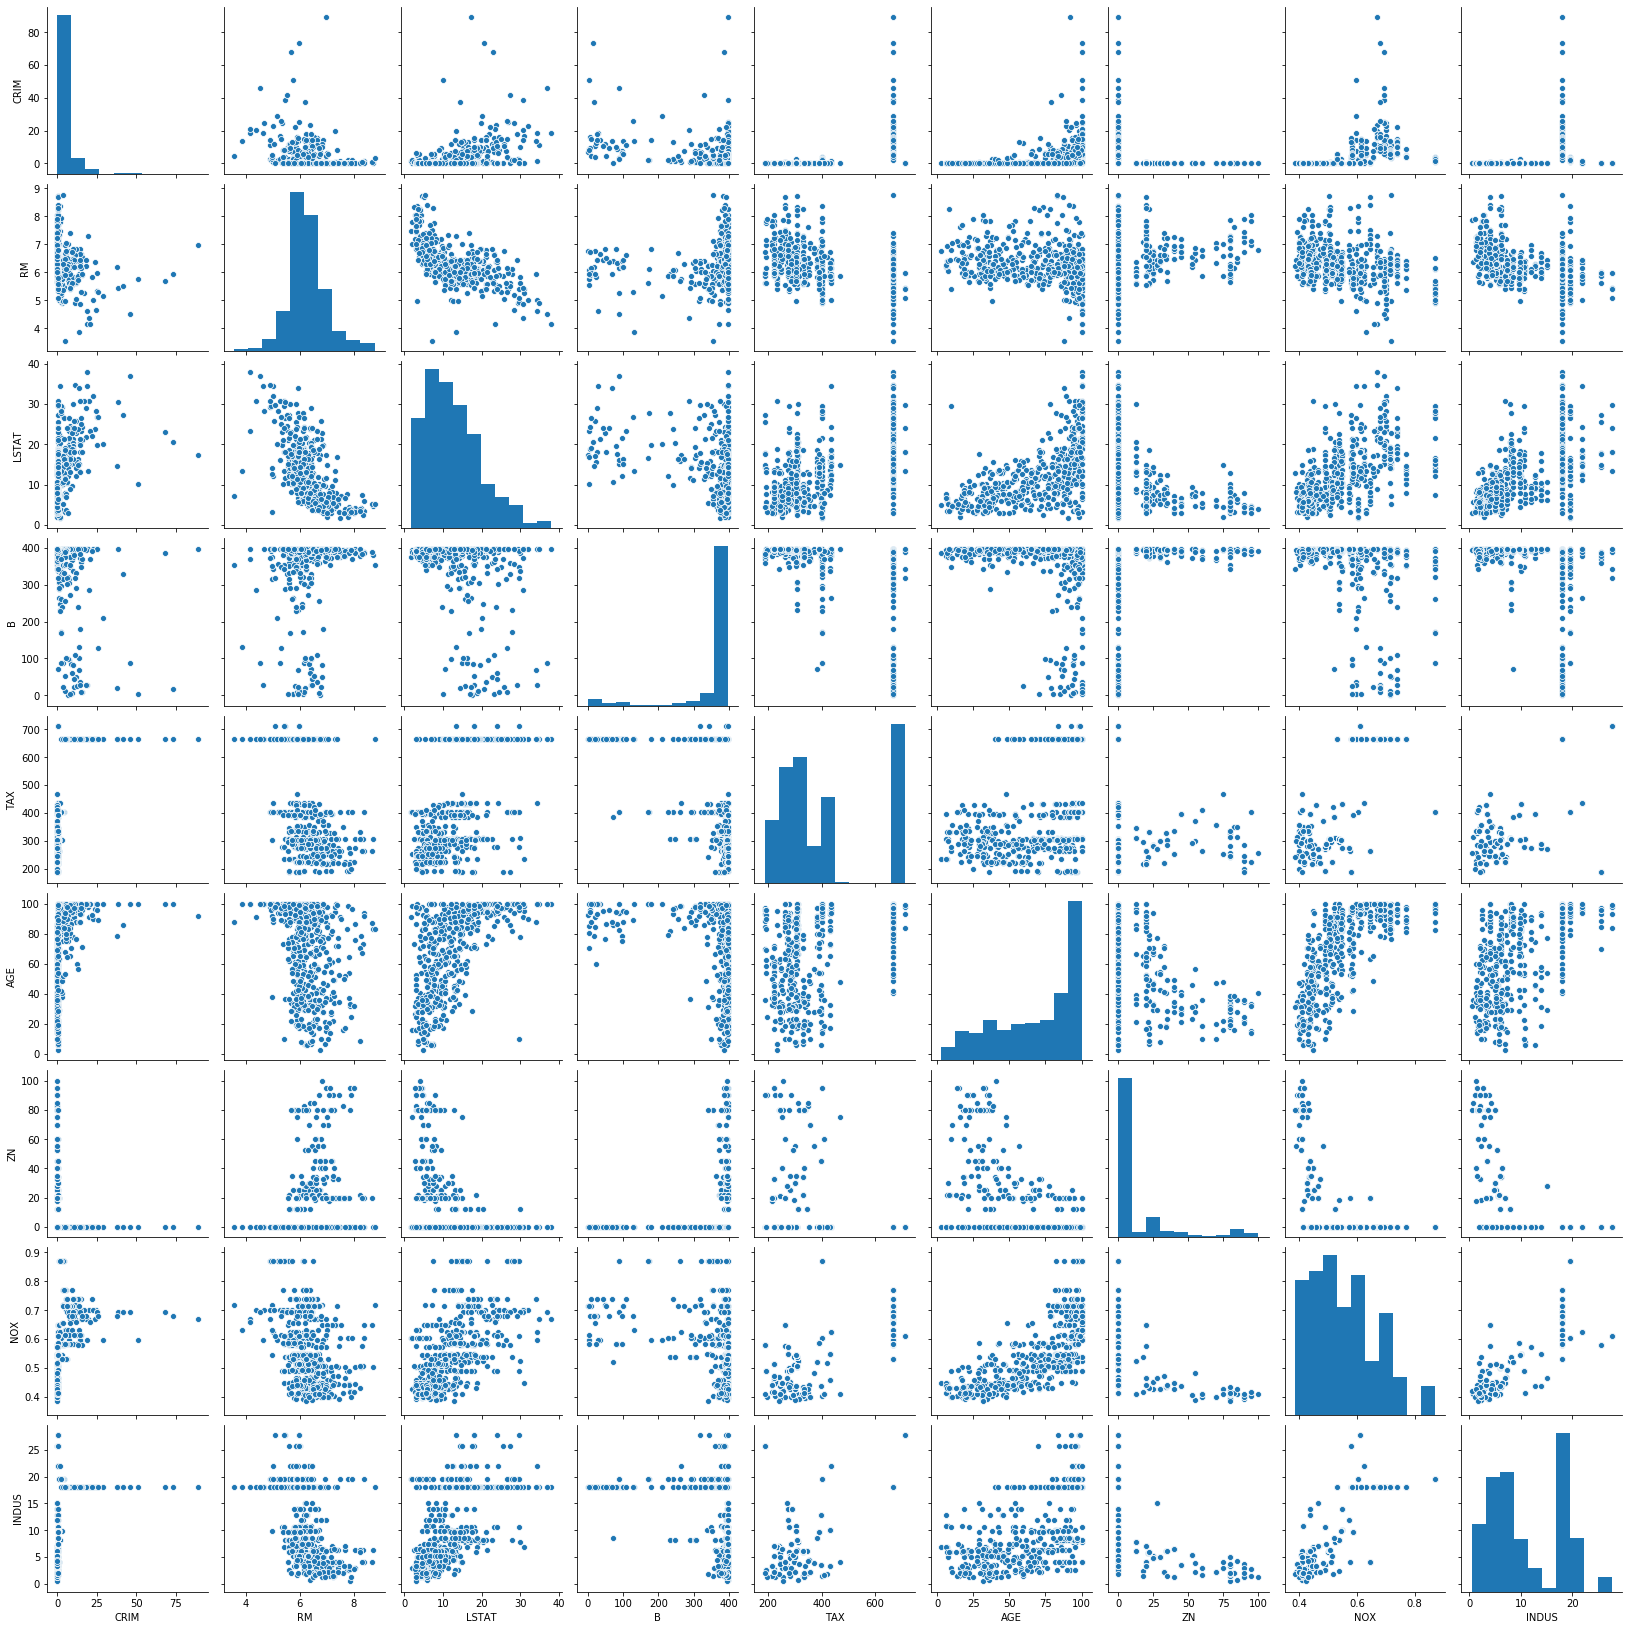

In [14]:
sns.heatmap(x_data.corr(), annot=True)
plt.show()

sns.pairplot(x_data)
plt.show()


 ['CRIM', 'RM', 'LSTAT', 'B', 'TAX', 'AGE', 'ZN', 'NOX', 'INDUS'] feature의 
 mse의 값은 27.41417245544864와 같으며, 그래프는 아래와 같습니다.


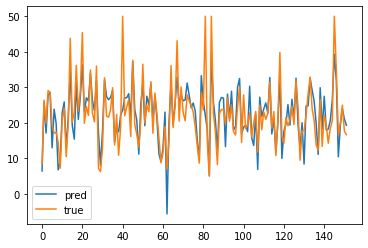

In [15]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif['features'] = x_data.columns
#vif

X = x_data
y = price
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   train_size=0.7,
                                                   random_state=102)
#x_train_one = sm.add_constant(x_train, has_constant='add')
fit_1 = sm.OLS(y_train, x_train)
fit_1 = fit_1.fit()

fit1_mse = mse(y_true=y_test, y_pred=fit_1.predict(x_test))
print(f'\n {list(vif["features"])} feature의 \n mse의 값은 {fit1_mse}와 같으며, 그래프는 아래와 같습니다.')
plt.plot(np.array(fit_1.predict(x_test)), label='pred')
plt.plot(np.array(y_test), label='true')
plt.legend()
plt.show()

-----------

### 3. 다중공선성과 회귀모델 성능 확인
#### (2) 다중공선성을 확인하여 변수 제거 후 모형의 성능 높이기

- Boston 주택 가격데이터 이용

> (1)의 변수들을 랜덤하게 제거하면서 mse가 더 낮은 feature만을 추출

In [16]:
x_data_list = list(x_data.columns)

In [17]:
def vif_get_rid_of(random_list):
    for num, i in enumerate(range(1, len(random_list)-1)):
        feature_list = random.sample(random_list, i)
        x_data2 = x_data.drop(feature_list, axis=1)
        vif2 = pd.DataFrame()
        vif2['VIF Factor'] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
        vif2['features'] = x_data2.columns
        X = x_data2
        y = price
        x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y,
                                                           train_size=0.7,
                                                           random_state=102)
        fit_2 = sm.OLS(y_train2, x_train2)
        fit_2 = fit_2.fit()
        mse_value = mse(y_true=y_test2, y_pred=fit_2.predict(x_test2))
        if mse_value < 27.414:
            print(f'\n ＊선택된 변수가{list(x_test2.columns)}일 때의\n mse값은 {mse_value}입니다\n\n 각 변수별 VIF값은 아래와 같습니다.\n{vif2}\n\n 그래프는 아래와 같습니다')
            plt.plot(np.array(fit_2.predict(x_test2)), label='pred')
            plt.plot(np.array(y_test2), label='true')
            plt.legend()
            plt.show()
            print('\n\n')

In [18]:
# 해당 함수를 실행할때마다 결과가 다르게 나옴(안나오는 경우도 있음)

vif_get_rid_of(x_data_list)